# Julia Fundamentals

## Basics

In [1]:
3 + 2

5

In [2]:
x = [1.5,2.6,3.7]

3-element Vector{Float64}:
 1.5
 2.6
 3.7

In [3]:
y = [2*i for i in 1:3] # array comprehension

3-element Vector{Int64}:
 2
 4
 6

In [5]:
using LinearAlgebra # loading a package

dot(x,y)

35.6

Julia has full **Unicode support**. We can therefore also write the dot-product as follows:

In [6]:
x ⋅ y # \cdot followed by <TAB>

35.6

In [7]:
5:7 # the range covering 5,6,7

5:7

In [8]:
f(x) = x^2

f (generic function with 1 method)

In [9]:
f(5)

25

In [10]:
function g(x)
    return x+x
end

g (generic function with 1 method)

In [11]:
g(3)

6

### Julia takes linear algebra seriously

In [41]:
M = rand(3,3) # create random 3x3 matrix

3×3 Matrix{Float64}:
 0.137161  0.0612139  0.164783
 0.540375  0.42805    0.758283
 0.4937    0.273706   0.180057

In [42]:
svd(M) # singular value decomposition

SVD{Float64, Float64, Matrix{Float64}, Vector{Float64}}
U factor:
3×3 Matrix{Float64}:
 -0.187055  -0.0693611  -0.979898
 -0.867261  -0.456835    0.19789
 -0.461377   0.886843    0.0252989
singular values:
3-element Vector{Float64}:
 1.172904228319261
 0.27209844768312386
 0.03567907124386562
Vt factor:
3×3 Matrix{Float64}:
 -0.615638  -0.433934  -0.657792
  0.666887   0.157812  -0.728256
 -0.419823   0.887016  -0.19223

In [43]:
v = rand(3); # use semicolon to surpress output

In [44]:
M * v # matrix-vector product

3-element Vector{Float64}:
 0.21845185299323108
 1.0128308223385043
 0.7095005968964234

In [45]:
v + v

3-element Vector{Float64}:
 1.94899205164563
 1.3126881954038954
 0.5414577818869661

In [49]:
v * v # not valid!

LoadError: MethodError: no method matching *(::Vector{Float64}, ::Vector{Float64})

[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m)
[0m[90m   @[39m [90mBase[39m [90m[4moperators.jl:578[24m[39m
[0m  *([91m::StridedMatrix{T}[39m, ::StridedVector{S}) where {T<:Union{Float32, Float64, ComplexF32, ComplexF64}, S<:Real}
[0m[90m   @[39m [35mLinearAlgebra[39m [90m~/.julia/juliaup/julia-1.9.3+0.aarch64.apple.darwin14/share/julia/stdlib/v1.9/LinearAlgebra/src/[39m[90m[4mmatmul.jl:49[24m[39m
[0m  *(::StridedVecOrMat, [91m::Adjoint{<:Any, <:LinearAlgebra.LQPackedQ}[39m)
[0m[90m   @[39m [35mLinearAlgebra[39m [90m~/.julia/juliaup/julia-1.9.3+0.aarch64.apple.darwin14/share/julia/stdlib/v1.9/LinearAlgebra/src/[39m[90m[4mlq.jl:269[24m[39m
[0m  ...


**Bonus question:** What do you think is computed in the following?

In [19]:
exp(M)

3×3 Matrix{Float64}:
 1.98676   2.29368  2.35536
 1.48033   2.94534  2.27495
 0.768669  1.82096  2.65838

### Broadcasting

(Recommended read: https://julialang.org/blog/2017/01/moredots/)

In [20]:
x .* y # "element-wise" application

3-element Vector{Float64}:
  3.0
 10.4
 22.200000000000003

In [21]:
sin(x)

LoadError: MethodError: no method matching sin(::Vector{Float64})

[0mClosest candidates are:
[0m  sin([91m::T[39m) where T<:Union{Float32, Float64}
[0m[90m   @[39m [90mBase[39m [90mspecial/[39m[90m[4mtrig.jl:29[24m[39m
[0m  sin([91m::UniformScaling[39m)
[0m[90m   @[39m [35mLinearAlgebra[39m [90m~/.julia/juliaup/julia-1.9.3+0.aarch64.apple.darwin14/share/julia/stdlib/v1.9/LinearAlgebra/src/[39m[90m[4muniformscaling.jl:173[24m[39m
[0m  sin([91m::Diagonal[39m)
[0m[90m   @[39m [35mLinearAlgebra[39m [90m~/.julia/juliaup/julia-1.9.3+0.aarch64.apple.darwin14/share/julia/stdlib/v1.9/LinearAlgebra/src/[39m[90m[4mdiagonal.jl:678[24m[39m
[0m  ...


In [22]:
sin.(x) # "element-wise" application

3-element Vector{Float64}:
  0.9974949866040544
  0.5155013718214642
 -0.5298361409084934

**Also works for user-defined functions!**

In [23]:
somefunc(x) = exp(2*x)

somefunc (generic function with 1 method)

In [24]:
somefunc.(x)

3-element Vector{Float64}:
   20.085536923187668
  181.27224187515122
 1635.984429995927

### Plotting

In [25]:
using Plots

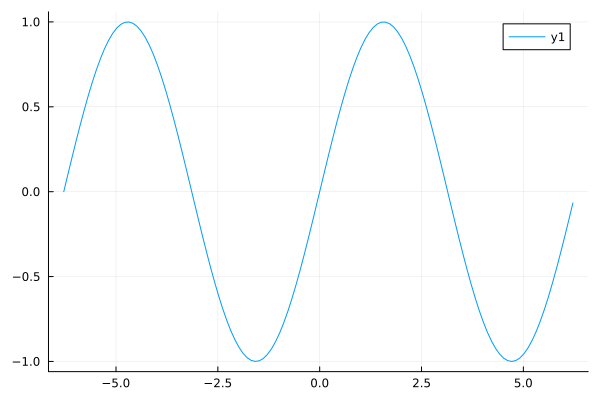

In [26]:
x = -2π:0.1:2π
plot(x, sin.(x))

**Personal recommendation** for simple plotting in a REPL on a HPC cluster: [UnicodePlots.jl](https://github.com/JuliaPlots/UnicodePlots.jl) (or UnicodePlots backend for Plots.jl).

In [30]:
using UnicodePlots
lineplot(x, sin.(x), canvas=DotCanvas)

      ┌────────────────────────────────────────┐ 
    1 │         .':        : :'.               │ 
      │         : '.       :.' :               │ 
      │        .'  :       ::  :               │ 
      │        :   :       ::   :              │ 
      │        :   :.      :    :              │ 
      │       .'    :      :    :              │ 
      │       :     :      :    '.             │ 
      │.......:.....:......:.....:.............│ 
      │             '.    ::     :     :       │ 
      │              :    ::     :    .'       │ 
      │              :    ::     ':   :        │ 
      │              :   : :      :   :        │ 
      │               :  : :      :   :        │ 
      │               :  : :       : :         │ 
   -1 │               '::  :       :.:         │ 
      └────────────────────────────────────────┘ 
       -10                                   10  

## No types, no performance

Although types aren't always explicitly visible, **Julia is built around types**.

High performance codes in Julia make good use of the type system.

In [ ]:
3 + 2

In [ ]:
3 + 2.0

In [ ]:
typeof(3)

In [ ]:
typeof(2.0)

In [ ]:
typeof([1,2,3])

Here, `Array` is a **parametric type**. The type parameters are
* `Int64` (element type)
* `1` (dimensionality)

Hence `Array{Int64, 1}` means that we have a vector that can hold 64-bit integers.

In [54]:
eltype([1,2,3])

Int64

In [53]:
typeof(rand(3,3))

Matrix{Float64} (alias for Array{Float64, 2})

In [52]:
typeof(5:7)

UnitRange{Int64}

In [ ]:
3 isa Int64

In [ ]:
3 isa Float64

In [ ]:
3 isa Number

**Concrete types**
* types of values ("objects")
* specify data structure
* Example: `Float64`

**Abstract types**
* cannot be instantiated
* their descendant types share "behavior" ([duck typing](https://en.wikipedia.org/wiki/Duck_typing))
* Examples:

The abstract type `Number` indicates that one can do number-like things, e.g. `+`,`-`,`*`, and `/`, with corresponding values. In this category we have (concrete) things like `Float64` (double precision float) and `Int32` (single precision integer) numbers.

An `AbstractArray` is a type that, e.g., allows indexing `A[i]`. Examples include regular arrays (`Array`), as well as ranges (`UnitRange`).

### Inspecting the type tree

In [30]:
using AbstractTrees
AbstractTrees.children(x) = subtypes(x)

In [31]:
print_tree(Number) # print a branch of the type tree

Number
├─ Complex
├─ Measurement
└─ Real
   ├─ AbstractFloat
   │  ├─ BigFloat
   │  ├─ Float16
   │  ├─ Float32
   │  └─ Float64
   ├─ AbstractIrrational
   │  ├─ Irrational
   │  └─ IrrationalConstant
   │     ├─ Fourinvπ
   │     ├─ Fourπ
   │     ├─ Halfπ
   │     ├─ Inv2π
   │     ├─ Inv4π
   │     ├─ Invsqrt2
   │     ├─ Invsqrt2π
   │     ├─ Invsqrtπ
   │     ├─ Invπ
   │     ├─ Log2π
   │     ├─ Log4π
   │     ├─ Loghalf
   │     ├─ Logten
   │     ├─ Logtwo
   │     ├─ Logπ
   │     ├─ Quartπ
   │     ├─ Sqrt2
   │     ├─ Sqrt2π
   │     ├─ Sqrt3
   │     ├─ Sqrt4π
   │     ├─ Sqrthalfπ
   │     ├─ Sqrtπ
   │     ├─ Twoinvπ
   │     └─ Twoπ
   ├─ FixedPoint
   │  ├─ Fixed
   │  └─ Normed
   ├─ Integer
   │  ├─ Bool
   │  ├─ Signed
   │  │  ├─ BigInt
   │  │  ├─ Int128
   │  │  ├─ Int16
   │  │  ├─ Int32
   │  │  ├─ Int64
   │  │  └─ Int8
   │  └─ Unsigned
   │     ├─ UInt128
   │     ├─ UInt16
   │     ├─ UInt32
   │     ├─ UInt64
   │     └─ UInt8
   ├─ Rational
   ├─ PValue


Everything is a subtype of `Any`. It's the root of the type tree.

Note that **concrete types are the leaves of the type tree** whereas **abstract types are nodes** in the type graph.

In [60]:
1 isa Integer

true

In [57]:
Integer <: Number

true

In [58]:
supertype(Integer)

Real

### Duck typing example: `UnitRange`

**"If it walks like a duck and it quacks like a duck, then it must be a duck"**

In [7]:
x = 1:30

1:30

In [8]:
typeof(x)

UnitRange{Int64}

In [9]:
typeof(x) <: AbstractArray

true

Because it is a subtype of `AbstractArray` we can do array-like things with it (it should basically behave like an array!)

In [10]:
x[3]

3

In [11]:
size(x)

(30,)

In [12]:
eltype(x)

Int64

However, it's not implemented like a regular `Array` at all. In fact, **it's just two numbers**, the start and stop values of the range it represents.

In [13]:
fieldnames(typeof(x))

(:start, :stop)

It thus represents a range but with a much lower memory footprint than a corresponding array.

In [15]:
sizeof([i for i in 1:10000000])

80000000

In [16]:
sizeof(1:10000000)

16

 Note that allocating memory takes (a lot of) time and is a common performance bottleneck that one wants to avoid.

## Functions, methods, and dispatch

Let's define a *function* that calculates the absolute value of a number (like the built-in `abs` already does).

**How would we practically calculate the absolute values of the numbers $-4.32$ and $1.0 + 1.0i$?**

* Real number
  * "Drop the sign."
    * => `myabs(-4.32) = 4.32`
* Complex number:
  * "Square root of z times the complex conjugate of z."
    * => `myabs(1.0 + 1.0im) = sqrt(2) ≈ 1.414`

We see that the *methods* that we use depend on the type of the number.

While the single **function** represents the *what* ("calculate the absolute value"), there might be different **methods** describing the *how*.

We can use the `::` operator to annotate function arguments with types and define different methods.

In [33]:
myabs(x::Float64) = sign(x) * x

myabs (generic function with 1 method)

In [34]:
myabs(-4.32)

4.32

In [35]:
myabs(1.0 + 1.0im)

MethodError: MethodError: no method matching myabs(::ComplexF64)

Closest candidates are:
  myabs(!Matched::Float64)
   @ Main ~/repos/JuliaWorkshops/JuliaHLRS23/notebooks/1_1_julia_fundamentals.ipynb:1


In [36]:
myabs(z::ComplexF64) = sqrt(real(z * conj(z)))

myabs (generic function with 2 methods)

In [37]:
myabs(1.0 + 1.0im)

1.4142135623730951

In [38]:
methods(myabs)

# 2 methods for generic function "myabs" from Main:
 [1] myabs(x::Float64)
     @ ~/repos/JuliaWorkshops/JuliaHLRS23/notebooks/1_1_julia_fundamentals.ipynb:1
 [2] myabs(z::ComplexF64)
     @ ~/repos/JuliaWorkshops/JuliaHLRS23/notebooks/1_1_julia_fundamentals.ipynb:1

One can check which particular method is being used through the `@which` macro.

In [39]:
@which myabs(-4.32)

myabs(x::Float64)
     @ Main ~/repos/JuliaWorkshops/JuliaHLRS23/notebooks/1_1_julia_fundamentals.ipynb:1

In [40]:
@which myabs(1.0 + 1.0im)

myabs(z::ComplexF64)
     @ Main ~/repos/JuliaWorkshops/JuliaHLRS23/notebooks/1_1_julia_fundamentals.ipynb:1

Note that we should better loosen our type restrictions:

In [41]:
myabs(-3)

MethodError: MethodError: no method matching myabs(::Int64)

Closest candidates are:
  myabs(!Matched::Float64)
   @ Main ~/repos/JuliaWorkshops/JuliaHLRS23/notebooks/1_1_julia_fundamentals.ipynb:1
  myabs(!Matched::ComplexF64)
   @ Main ~/repos/JuliaWorkshops/JuliaHLRS23/notebooks/1_1_julia_fundamentals.ipynb:1


In [42]:
myabs(1 + 1im)

MethodError: MethodError: no method matching myabs(::Complex{Int64})

Closest candidates are:
  myabs(!Matched::Float64)
   @ Main ~/repos/JuliaWorkshops/JuliaHLRS23/notebooks/1_1_julia_fundamentals.ipynb:1
  myabs(!Matched::ComplexF64)
   @ Main ~/repos/JuliaWorkshops/JuliaHLRS23/notebooks/1_1_julia_fundamentals.ipynb:1


In [43]:
myabs(x::Real) = sign(x) * x
myabs(z::Complex) = sqrt(real(z * conj(z)))

myabs (generic function with 4 methods)

In [44]:
myabs(-3)

3

As we will understand later, type annotations in function signatures **virtually never affect performance**! One should therefore generally make them as generic as possible but as specific as necessary.

### Multiple dispatch

Which method gets executed when you call a generic function `f` for a given set of input arguments?

**Answer:** Julia always chooses the **most specific method** by considering **all input argument types**.

(Since methods belong to generic functions rather than objects no function argument is special.)

In [45]:
f(a, b::Any)              = "fallback"
f(a::Number, b::Number)   = "a and b are both numbers"
f(a::Number, b)           = "a is a number"
f(a, b::Number)           = "b is a number"
f(a::Integer, b::Integer) = "a and b are both integers"

f (generic function with 6 methods)

In [46]:
methods(f)

# 6 methods for generic function "f" from Main:
 [1] f(a::Integer, b::Integer)
     @ ~/repos/JuliaWorkshops/JuliaHLRS23/notebooks/1_1_julia_fundamentals.ipynb:5
 [2] f(a::Number, b::Number)
     @ ~/repos/JuliaWorkshops/JuliaHLRS23/notebooks/1_1_julia_fundamentals.ipynb:2
 [3] f(a::Number, b)
     @ ~/repos/JuliaWorkshops/JuliaHLRS23/notebooks/1_1_julia_fundamentals.ipynb:3
 [4] f(x)
     @ ~/repos/JuliaWorkshops/JuliaHLRS23/notebooks/1_1_julia_fundamentals.ipynb:1
 [5] f(a, b::Number)
     @ ~/repos/JuliaWorkshops/JuliaHLRS23/notebooks/1_1_julia_fundamentals.ipynb:4
 [6] f(a, b)
     @ ~/repos/JuliaWorkshops/JuliaHLRS23/notebooks/1_1_julia_fundamentals.ipynb:1

In [47]:
f(1.5, 2)

"a and b are both numbers"

In [48]:
f(1, "NHR")

"a is a number"

In [49]:
f(1, 2)

"a and b are both integers"

In [50]:
f("Hello", "NHR!")

"fallback"

In [51]:
@which f(1, 2)

f(a::Integer, b::Integer)
     @ Main ~/repos/JuliaWorkshops/JuliaHLRS23/notebooks/1_1_julia_fundamentals.ipynb:5

In [52]:
@which f(1, "NHR")

f(a::Number, b)
     @ Main ~/repos/JuliaWorkshops/JuliaHLRS23/notebooks/1_1_julia_fundamentals.ipynb:3

### Built-in Julia function

**Julia's built-in functions are not special by any means.**

In [ ]:
methods(+)

In [ ]:
@which true + false

In [ ]:
@which "Hello"*"World!"

We can easily modify or add methods to them as well.

In [62]:
import Base: + # we have to explicitly import functions to override/add methods

+(x::String, y::String) = x * "_" * y

+ (generic function with 229 methods)

In [63]:
"Hello" + "Stuttgart! 😄"

"Hello_Stuttgart! 😄"

(**Type piracy**: as we neither *own* the `+` function nor the `String` type the above is bad practice and is only used for pedagogical reasons! 😉)

### Type parameters in function signatures

Naive approach:

In [ ]:
myfunc(v::Vector{Real}) = "I'm a real vector!"

In [ ]:
myfunc([1.0,2.0,3.0])

Huh? What's going on?

Note that although we have

In [ ]:
Float64 <: Real

parametric types have the following - at first somewhat counterintuitive - property

In [ ]:
Vector{Float64} <: Vector{Real}

In [ ]:
[1.0,2.0,3.0] isa Vector{Real}

The crucial point is that `Vector{Real}` describes a concrete **heterogeneous** vector: Each element can be of any type `T <: Real`.

In [ ]:
Real[1, 2.2, 13f0]

(Because it is a concrete type - a leaf of the type tree - it immediately follows that there are no subtypes.)

What we often actually *mean* when writing `myfunc(v::Vector{Real}) = ...` is

In [ ]:
myfunc(v::Vector{T}) where T<:Real = "I'm a real vector!"

In [ ]:
myfunc([1.0,2.0,3.0])

Here, `Vector{T} where T <: Real` describes all **homogeneous** vector types: Each vector can only hold elements of a specific type `T` that is a subtype of `Real`. This includes, for example: `Vector{Float64}, Vector{Int64}, Vector{Int32}, Vector{AbstractFloat}, ...`

(Side comment: We can also use the `where` notation to write out our naive `Vector{Real}` from above in a more explicit way: `Vector{Real} === Vector{T where T<:Real}`. Note that the "degree of freedom", `T`, is inside of the curly braces.)

# Core messages of this notebook

* **Concrete types** describe data structures, i.e. concrete implementations.
* **Abstract types** define the kind of a thing (What is it? What can I do with it?), i.e. an informal interface. This is also known as **duck-typing**.
* A **function** (the what) can have multiple **methods** (the how).
* Types in function signatures serve as filters. **Avoid writing overly-specific types**.
* **Multiple dispatch**: Julia selects the method to run based on the types of all input arguments and chooses the most specialized one.
* Types can have parameters, i.e. `Vector{Float64}`. We can use the notation `Vector{T} where T<:SomeSuperType` to describe sets of restriced *homogeneous* vectors.